In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import logging
import requests
import datetime as dt
import pylab

import scipy.stats as stats
from matplotlib import pyplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

logging.getLogger().setLevel(logging.INFO)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os, sys

home = os.environ["HOME"]
sys.path.append(f"{home}/Desktop/project-ursa/lib")
import imp

np.seterr(divide = 'ignore') 


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
import bsm_utils
imp.reload(bsm_utils)

import delta_hedge
imp.reload(delta_hedge)

<module 'delta_hedge' from '/Users/merkle-employee/Desktop/project-ursa/lib/delta_hedge.py'>

In [4]:
import mining_constants
imp.reload(mining_constants)

import backtest
imp.reload(backtest)

<module 'backtest' from '/Users/merkle-employee/Desktop/project-ursa/lib/backtest.py'>

In [14]:
import delta_hedge
imp.reload(delta_hedge)

import backtest
imp.reload(backtest)

mc_params = {
    "S": 100,
    "K": 100,
    "T": 1/52,
    "mc_size": 500, 
    "sigma_iv": 0.4, 
    "sigma_rv": 0.4,
    "interest_rate" : 0.02,
    "Q": 100000, 
    "contract_direction": mining_constants.DIRECTION_LONG_CONTRACT, 
    "contract_type": mining_constants.CONTRACT_CALL_OPTION, 
    "sample_rate": mining_constants.SAMPLE_RATE_HOURLY, 
    "risk_free_rate": 0.02,  
    "slippage": 0.0001
}

np.random.seed(0)
mcb = backtest.MonteCarloBacktest(mc_params)
sim_df = mcb.price_model()


INFO:root:mc_params = {'S': 100, 'K': 100, 'T': 0.019230769230769232, 'mc_size': 500, 'sigma_iv': 0.4, 'sigma_rv': 0.4, 'interest_rate': 0.02, 'Q': 100000, 'contract_direction': 'DIRECTION_LONG', 'contract_type': 'CONTRACT_CALL_OPTION', 'sample_rate': 8760, 'risk_free_rate': 0.02, 'slippage': 0.0001}
/Users/merkle-employee/Desktop/project-ursa/lib/bsm_utils.py:18: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))


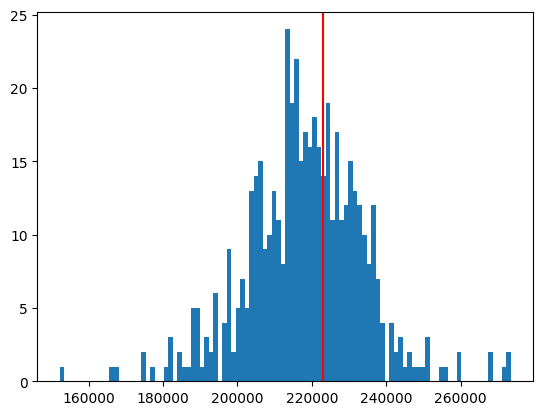

In [15]:
_ = plt.hist(sim_df.hedging_cost, bins=100)
plt.axvline(sim_df.agg_bsm_price.mean(), color="r")

In [20]:
# sim_df.hedging_cost.mean()

In [21]:
# sim_df.hedging_cost.std()

In [22]:
res

,ITM,Final Spot,strike,purchase_cost,purchase_cost_no_loss,hedging_cost,hedging_cost_no_loss,expiry_cashflow,bsm_price,agg_bsm_price,df
0,False,99.518338,100,2.108624e+05,2.183473e+05,210862.396896,218347.279448,0.000000e+00,2.230647,223064.66378,t delta price slippage ...
1,False,93.446667,100,2.451079e+05,2.509122e+05,245107.911185,250912.211363,0.000000e+00,2.230647,223064.66378,t delta price slipp...
2,True,102.458861,100,1.022427e+07,1.022902e+07,228115.105974,232866.157531,-9.996155e+06,2.230647,223064.66378,t delta price slippage ...
3,False,96.980851,100,2.130384e+05,2.186012e+05,213038.354190,218601.155001,0.000000e+00,2.230647,223064.66378,t delta price slipp...
4,False,99.368096,100,2.189578e+05,2.229491e+05,218957.780384,222949.108709,0.000000e+00,2.230647,223064.66378,t delta price slippage ...
...,...,...,...,...,...,...,...,...,...,...,...
495,True,102.396059,100,1.022058e+07,1.022722e+07,224422.683775,231062.377246,-9.996155e+06,2.230647,223064.66378,t delta price slippage ...
496,False,99.234956,100,1.980597e+05,2.036053e+05,198059.674794,203605.340696,0.000000e+00,2.230647,223064.66378,t delta price slippage ...
497,False,97.302581,100,2.151828e+05,2.208581e+05,215182.788835,220858.127819,0.000000e+00,2.230647,223064.66378,t delta price slipp...
498,False,99.957853,100,1.522464e+05,1.587711e+05,152246.431687,158771.071682,0.000000e+00,2.230647,223064.66378,t delta price slippage ...
